# **Data Modeling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
sns.set_theme()
from sklearn import preprocessing, datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
!pip install yellowbrick  
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("dataset.csv", sep = ',', index_col = 0)
dataset = dataset.drop_duplicates(keep = 'first')
dataset = dataset.drop(dataset[dataset['track_id'] == '1kR4gIb7nGxHPI3D2ifs59'].index)
dataset['explicit'] = dataset['explicit'].astype('str')
dataset['track_genre'] = dataset['track_genre'].astype('str')
dataset['artists'] = dataset['artists'].str.replace(';',', ')
dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson, ZAYN",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


---

## **PCA - Whole Dataset**

In [3]:
data = dataset.drop(columns = ['track_id', 'artists', 'album_name', 'track_name'])

data['explicit'] = data['explicit'].replace(['False', 'True'], ['0', '1'])
data = pd.get_dummies(data = data, columns = ['track_genre'])

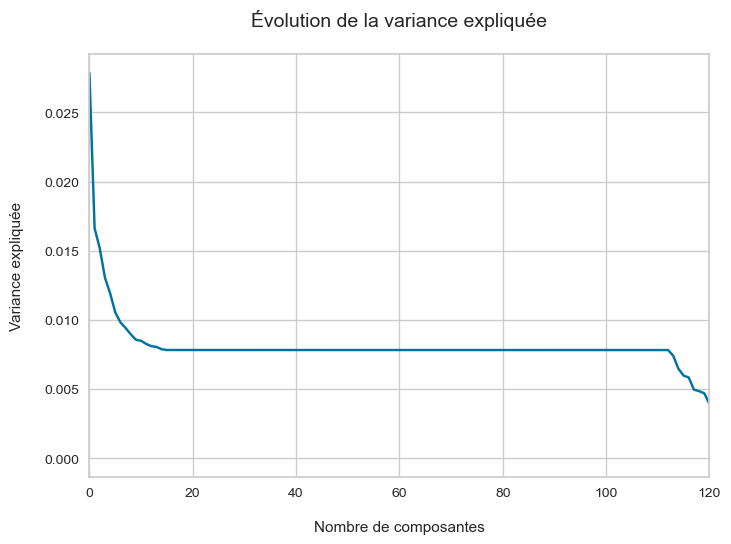

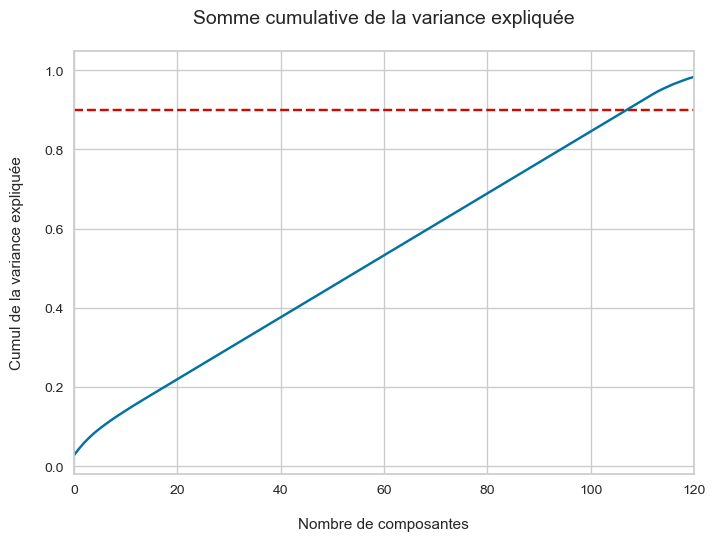

In [5]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0,120)
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance ratio', pad = 20, fontsize = 14)
plt.xlabel('Number of components', labelpad = 15)
plt.ylabel('Explained variance', labelpad = 15);

plt.figure()
plt.xlim(0,120)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative explained variance', pad = 20, fontsize = 14)
plt.xlabel('Number of components', labelpad = 15)
plt.ylabel('Cumulative explained variance', labelpad = 15);

In [6]:
pca = PCA(n_components = 0.9)
pca.fit(data)
print("The number of components is:", pca.n_components_)

Nombre de composantes retenues : 109


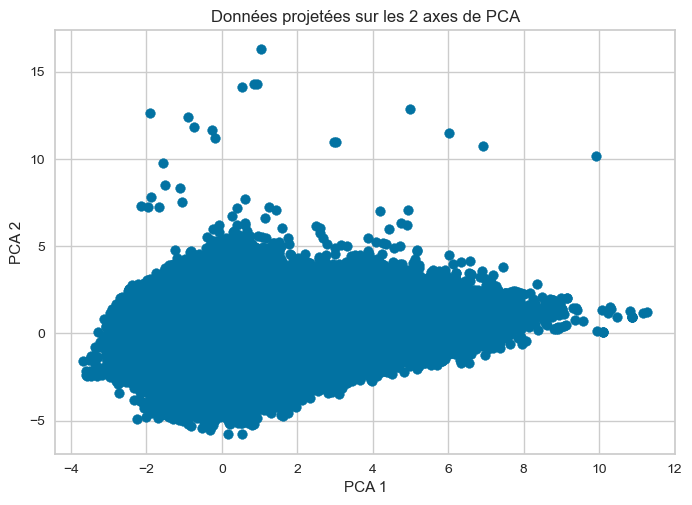

La part de variance expliquée est 0.91


In [7]:
pca = PCA(n_components = 109)
data_2D = pca.fit_transform(data)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:, 0], data_2D[:, 1], cmap = plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show();

print(round(pca.explained_variance_ratio_.sum(),2))

---

# **PCA - Dataset with families of genres**

## **PCA**

In [4]:
data_genres = dataset.drop(columns = ['track_id', 'artists', 'album_name', 'track_name']) 
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['spanish', 'pagode', 'world-music', 'iranian', 'turkish', 'swedish', 
                                                                               'german', 'malay', 'indian', 'british', 'french', 'brazil', 'forro', 
                                                                               'sertanejo', 'mpb'], 'musiques du monde'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['hardstyle', 'minimal-techno', 'detroit-techno'], 'techno'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['kids', 'anime', 'disney', 'children'], 'musiques pour enfants'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['alt-rock', 'alternative', 'grunge'], 'alternative rock'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['chicago-house', 'progressive-house', 'deep-house'], 'house'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['emo', 'grindcore', 'punk', 'punk-rock', 'goth'], 'punk'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['death-metal', 'black-metal', 'metalcore', 'heavy-metal'], 'metal'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['j-rock', 'j-idol', 'j-dance', 'j-pop', 'k-pop', 'cantopop', 'mandopop'], 
                                                                               "K-pop et musiques contemporaines d'Asie"))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['hardcore', 'edm', 'idm', 'garage'], 'dance'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['hard-rock', 'power-pop', 'psych-rock', 'rockabilly', 'rock-n-roll'], 'rock'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['industrial', 'guitar', 'sad', 'happy', 'acoustic', 'piano', 'romance', 
                                                                               'study', 'party', 'breakbeat'], 'divers'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['ambient', 'new-age', 'chill', 'sleep'], "musiques d'ambiance"))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['comedy', 'pop-film', 'show-tunes'], 'chansons de films et humour'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['groove', 'gospel', 'soul'], 'soul, gospel'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['synth-pop', 'pop'], 'pop'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['folk', 'honky-tonk', 'bluegrass'], 'country'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['songwriter', 'singer-songwriter', 'indie-pop'], 'indie'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['hip-hop'], 'hip-hop'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['dubstep', 'dancehall', 'ska', 'dub'], 'reggae, dancehall'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['reggaeton', 'latin', 'latino', 'reggae', 'salsa', 'samba', 'tango'], 
                                                                               'Reggaeton et musiques latines'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['opera', 'classical'], 'musique classique'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['electronica', 'electronic', 'club'], 'electro'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['drum-and-bass'], 'drum & bass'))
data_genres['track_genre'] = data_genres['track_genre'].replace(dict.fromkeys(['r-n-b', 'rnb'], 'RnB'))

data_genres['explicit'] = data_genres['explicit'].replace(['False', 'True'], ['0', '1'])
data_genres = pd.get_dummies(data = data_genres, columns = ['track_genre'])


In [5]:
data_genres = data_genres.loc[data_genres['popularity'] > 40]
data_genres

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_musiques du monde,track_genre_musiques pour enfants,track_genre_pop,track_genre_punk,"track_genre_reggae, dancehall",track_genre_rock,"track_genre_soul, gospel",track_genre_techno,track_genre_trance,track_genre_trip-hop
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0,0,0,0,0,0,0,0,0,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0,0,0,0,0,0,0,0,0,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0,0,0,0,0,0,0,0,0,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0,0,0,0,0,0,0,0,0,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113973,44,260839,0,0.319,0.5770,4,-7.679,1,0.0330,0.0499,...,1,0,0,0,0,0,0,0,0,0
113976,42,253546,0,0.522,0.6970,2,-7.210,1,0.0344,0.0557,...,1,0,0,0,0,0,0,0,0,0
113980,41,238146,0,0.516,0.6340,7,-4.850,1,0.0339,0.0300,...,1,0,0,0,0,0,0,0,0,0
113984,44,237280,0,0.541,0.5830,2,-7.047,1,0.0285,0.0142,...,1,0,0,0,0,0,0,0,0,0


In [6]:
df = data_genres

In [7]:
scaler = StandardScaler()
scaler.fit(df)

data_scaled = scaler.transform(df)

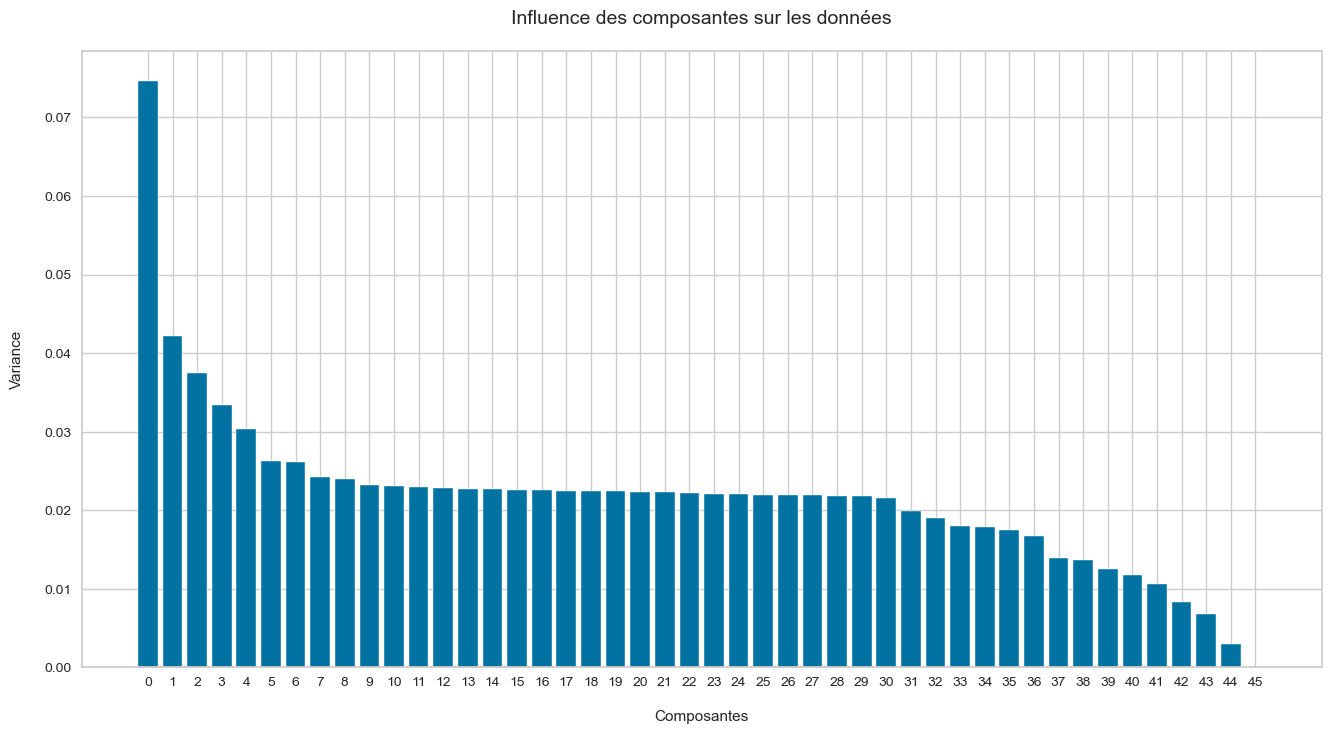

In [12]:
pca = PCA()
pca.fit(data_scaled)

features = range(pca.n_components_)

data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

plt.figure(figsize = (16,8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Variance', labelpad = 15)
plt.xlabel('Components', labelpad = 15)

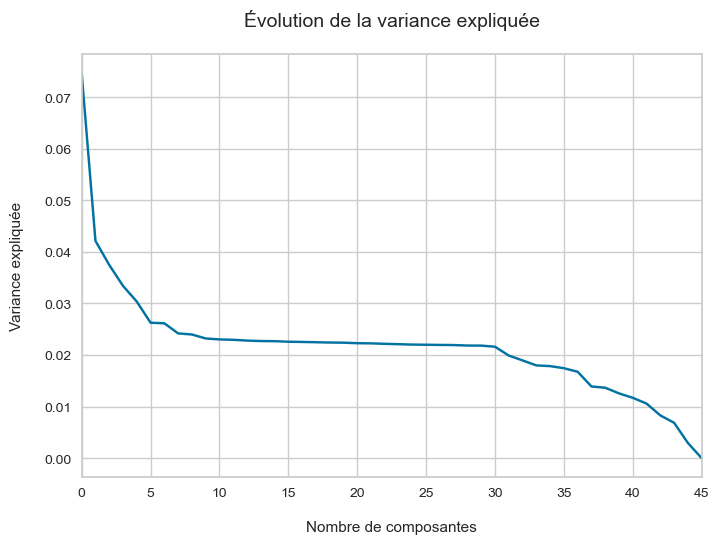

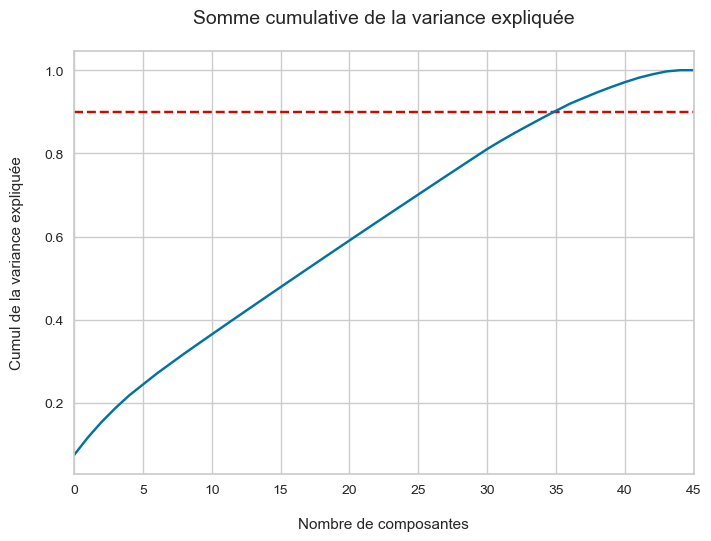

In [13]:
plt.figure()
plt.xlim(0,45)
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance', pad = 20, fontsize = 14)
plt.xlabel('Number of Components', labelpad = 15)
plt.ylabel('Explained Variance', labelpad = 15);

# Affichage graphique de la somme cumulative de la variance expliquée :
plt.figure()
plt.xlim(0,45)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance', pad = 20, fontsize = 14)
plt.xlabel('Number of Components', labelpad = 15)
plt.ylabel('Cumulative Explained Variance', labelpad = 15);


In [14]:
pca = PCA(n_components = 0.9)
pca.fit(data_scaled)
print("The number of components is:", pca.n_components_)

Nombre de composantes retenues : 36


In [8]:
pca2 = PCA(n_components = 36)
pca2.fit(data_scaled)
data_pca2 = pca2.transform(data_scaled)

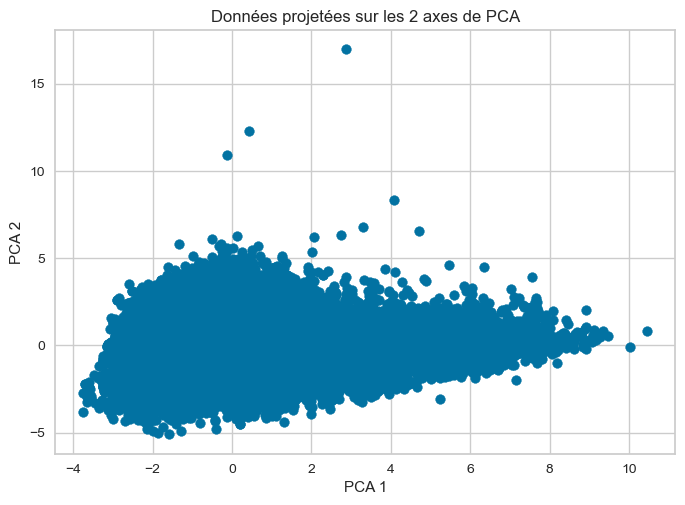

In [16]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_pca2[:, 0], data_pca2[:, 1], cmap = plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show();

## **K-Means**

In [ ]:
inertie = []
for n in range(1, 51):
    kmeans = (KMeans(n_clusters = n, init='k-means++', random_state = 42))
    kmeans.fit(data_pca2)
    inertie.append(kmeans.inertia_)    

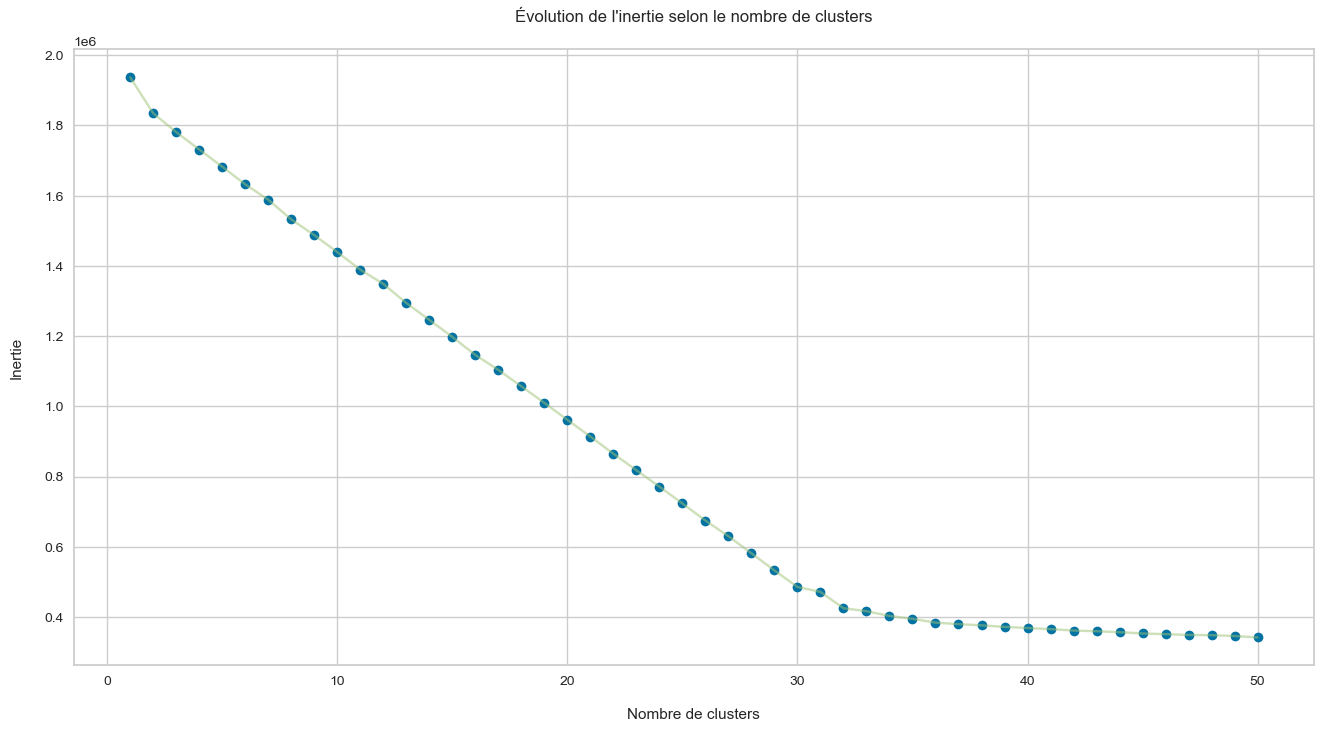

In [19]:
plt.figure(1, figsize = (16, 8))
plt.plot(np.arange(1, 51), inertie, 'o')
plt.plot(np.arange(1, 51), inertie, '-', alpha = 0.5)
plt.xlabel('Number of clusters', labelpad = 15), 
plt.ylabel('Inertia', labelpad = 15)
plt.show()

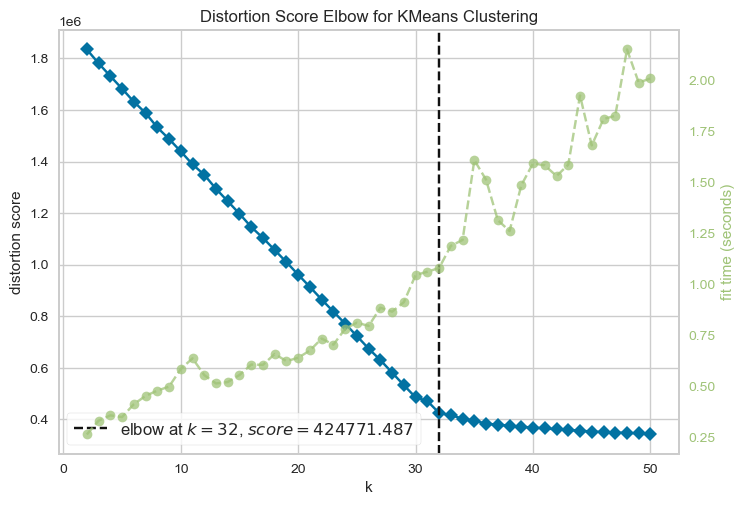

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
X = data_pca2
km = KMeans(random_state = 42)
visualizer = KElbowVisualizer(km, k = (2,51))
 
visualizer.fit(X)        
visualizer.show()      

For n_clusters = 31 The average silhouette_score is : 0.41182750116292843
For n_clusters = 32 The average silhouette_score is : 0.4081347809321632


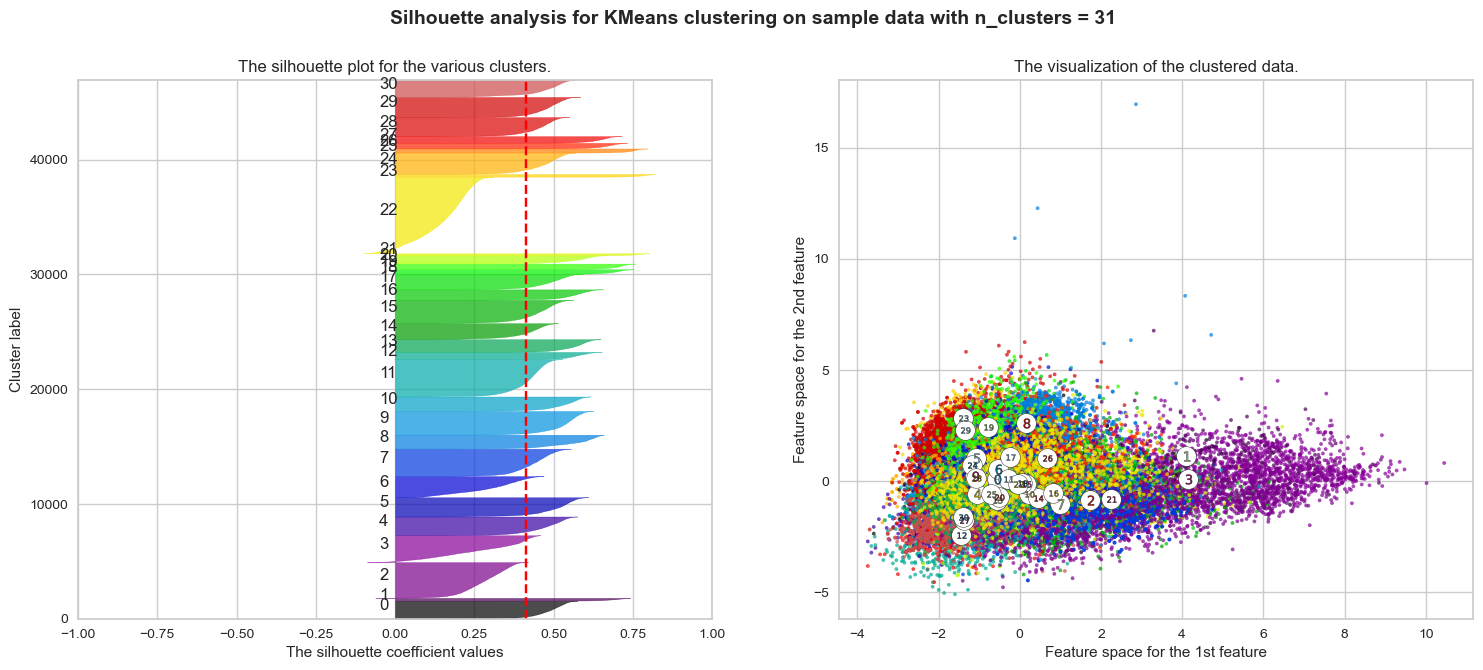

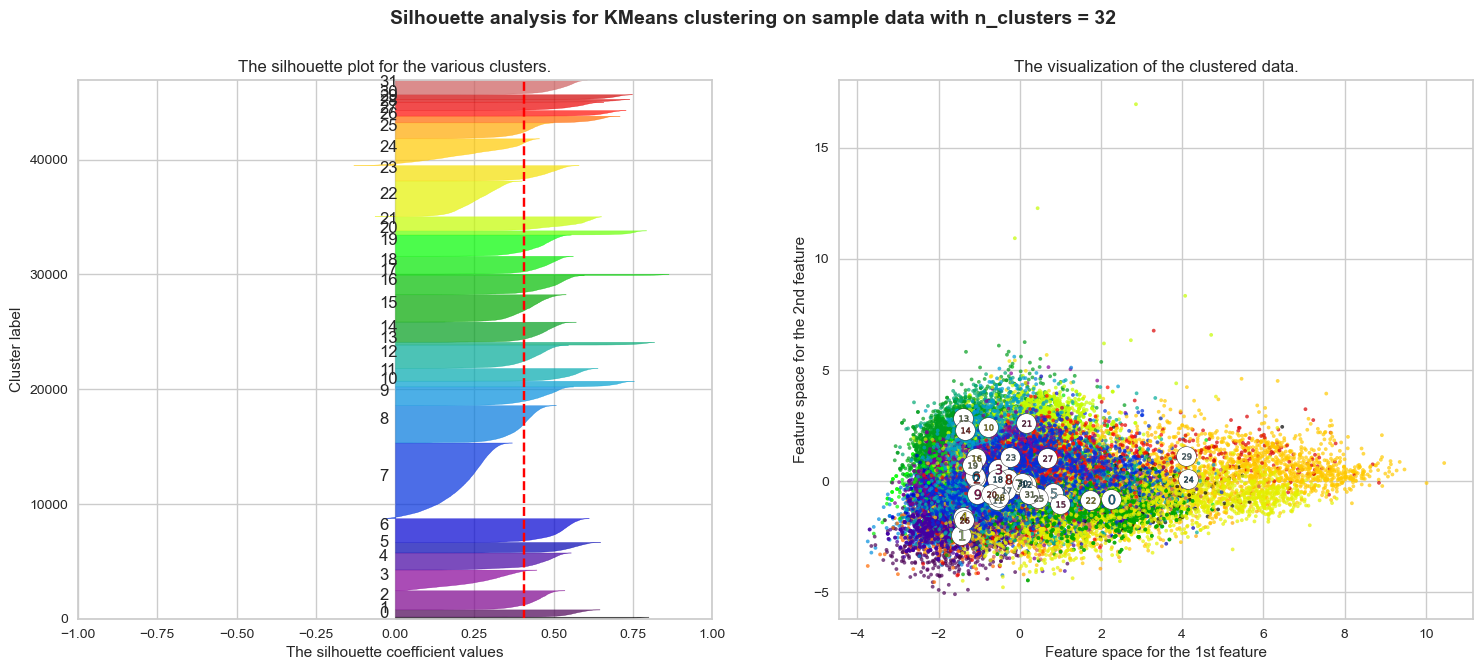

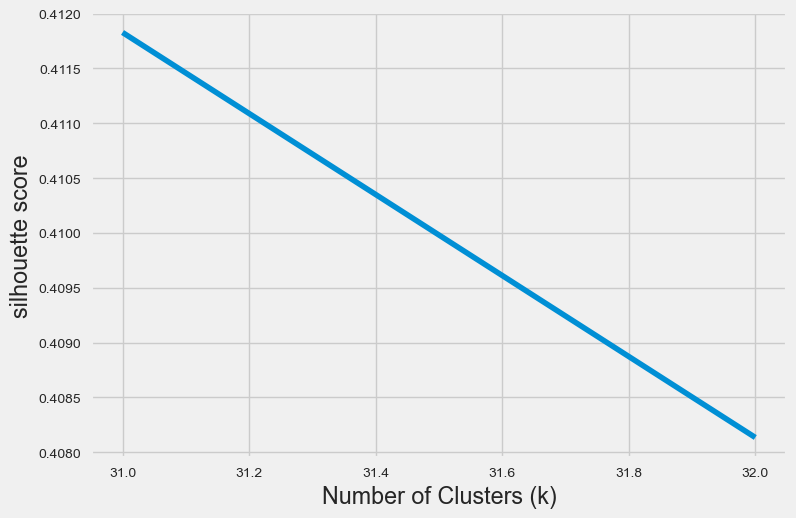

In [21]:
range_n_clusters = [31, 32]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

---

## **Finalization**

In [9]:
kmeans = KMeans(n_clusters = 31, init = 'k-means++')

pipeline = make_pipeline(scaler, pca2, kmeans)

model_fit = pipeline.fit(df)
model_fit

labels = model_fit.predict(df)
df['Clusters'] = labels

df.groupby('Clusters').count()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_musiques du monde,track_genre_musiques pour enfants,track_genre_pop,track_genre_punk,"track_genre_reggae, dancehall",track_genre_rock,"track_genre_soul, gospel",track_genre_techno,track_genre_trance,track_genre_trip-hop
Clusters,,,,,,,,,,,,,,,,,,,,,
0,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108,...,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108
1,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375,...,2375,2375,2375,2375,2375,2375,2375,2375,2375,2375
2,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,...,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241
3,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,...,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062
4,625,625,625,625,625,625,625,625,625,625,...,625,625,625,625,625,625,625,625,625,625
5,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665,...,1665,1665,1665,1665,1665,1665,1665,1665,1665,1665
6,8353,8353,8353,8353,8353,8353,8353,8353,8353,8353,...,8353,8353,8353,8353,8353,8353,8353,8353,8353,8353
7,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,...,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249
8,903,903,903,903,903,903,903,903,903,903,...,903,903,903,903,903,903,903,903,903,903


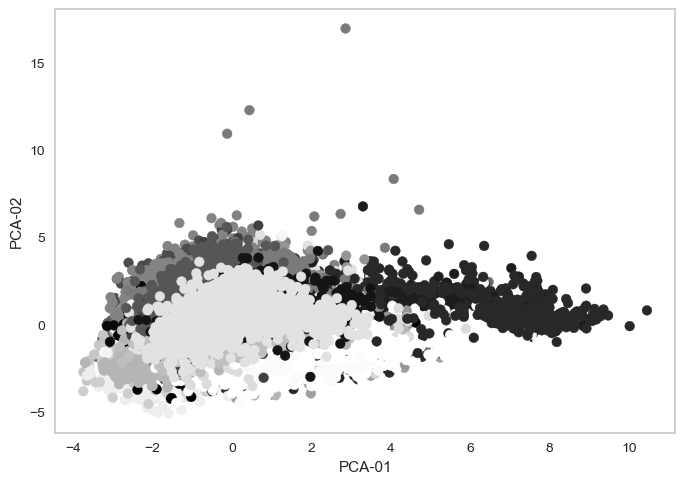

In [10]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(xs, ys, c = labels)

plt.grid(False)
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [11]:
cluster_heatmap_df = df.groupby(['Clusters'])[['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 "track_genre_K-pop et musiques contemporaines d'Asie",
 'track_genre_Reggaeton et musiques latines',
 'track_genre_RnB',
 'track_genre_afrobeat',
 'track_genre_alternative rock',
 'track_genre_blues',
 'track_genre_chansons de films et humour',
 'track_genre_country',
 'track_genre_dance',
 'track_genre_disco',
 'track_genre_divers',
 'track_genre_drum & bass',
 'track_genre_electro',
 'track_genre_funk',
 'track_genre_hip-hop',
 'track_genre_house',
 'track_genre_indie',
 'track_genre_jazz',
 'track_genre_metal',
 'track_genre_musique classique',
 "track_genre_musiques d'ambiance",
 'track_genre_musiques du monde',
 'track_genre_musiques pour enfants',
 'track_genre_pop',
 'track_genre_punk',
 'track_genre_reggae, dancehall',
 'track_genre_rock',
 'track_genre_soul, gospel',
 'track_genre_techno',
 'track_genre_trance',
 'track_genre_trip-hop']].median()

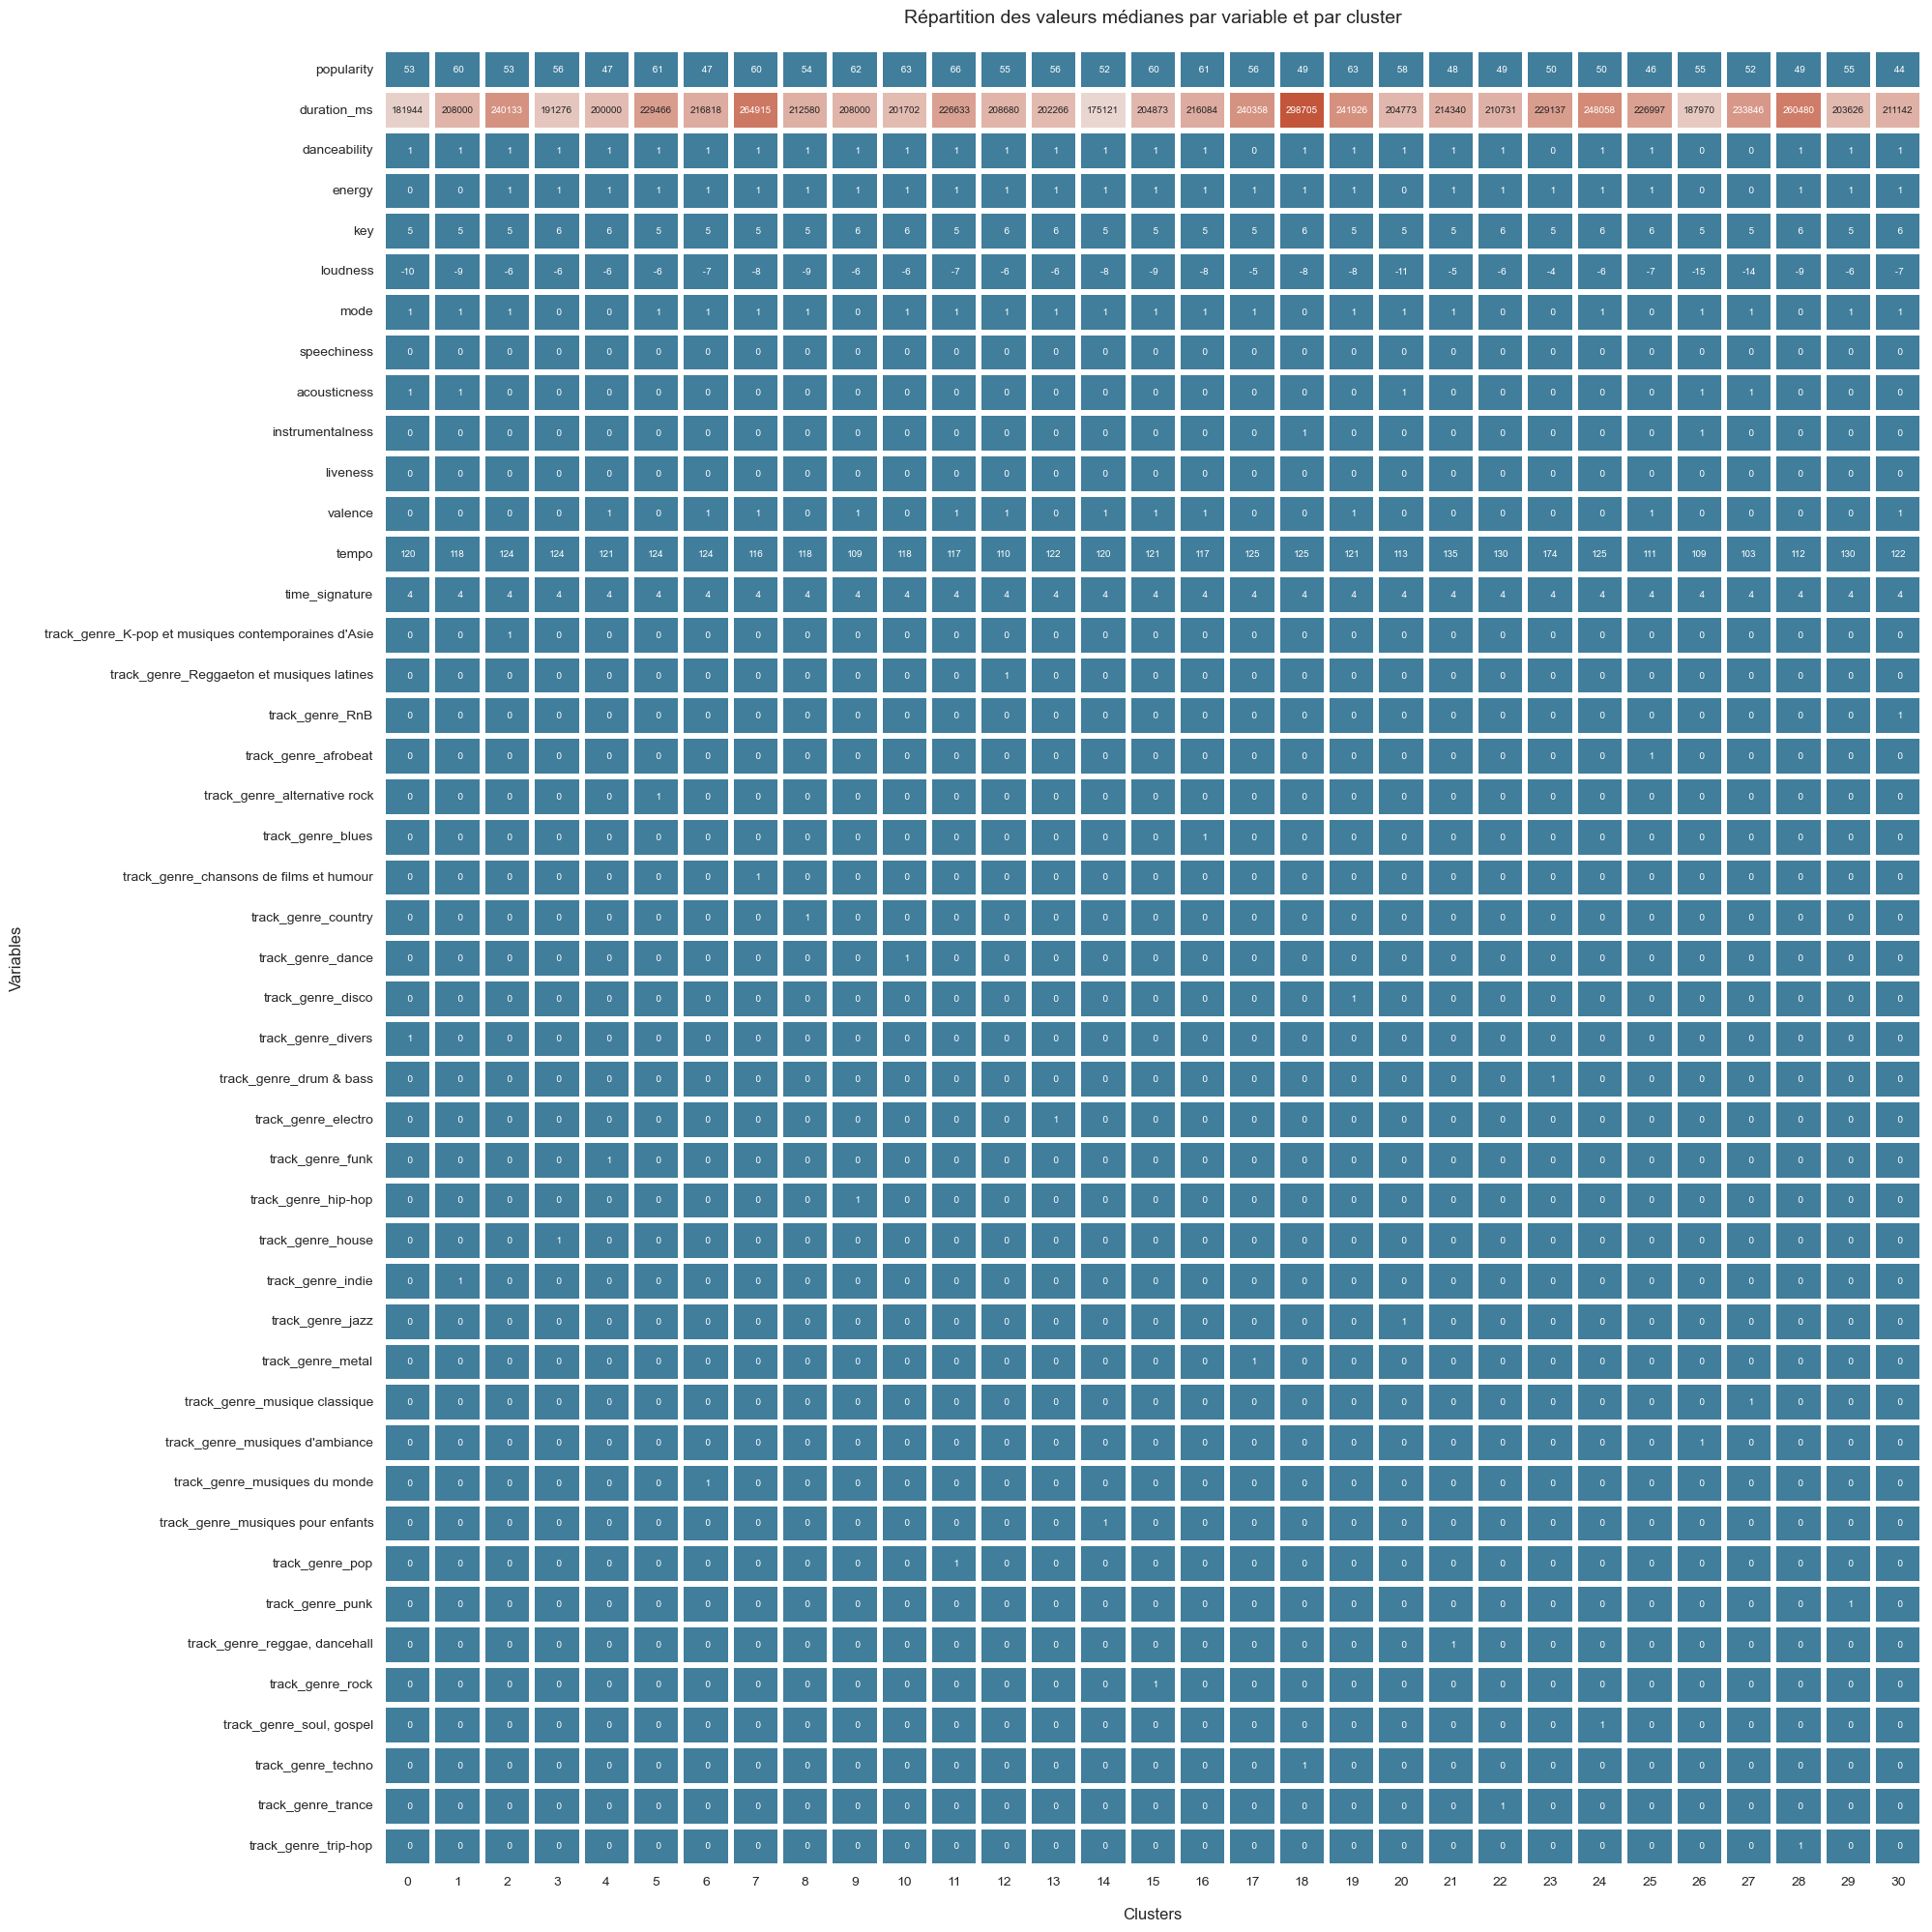

In [12]:
heatcmap = sns.diverging_palette(230, 20, as_cmap = True)
fig, ax = plt.subplots(1, 1, figsize = (20, 20))
sns.set(font_scale = 0.6)
sns.heatmap(cluster_heatmap_df.T, linewidth = 3, cmap = heatcmap, cbar = False, annot = True, ax = ax, fmt='3.0f');
ax.set_title('Répartition des valeurs médianes par variable et par cluster', fontsize = 14, pad = 20)
plt.xlabel('Clusters', fontsize = 12, labelpad = 15)
plt.ylabel('Variables', fontsize = 12, labelpad = 15)
plt.tight_layout();

---

# **PCA - Dataset without any music genre**

## **PCA**

In [14]:
data = dataset.drop(columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

data['explicit'] = data['explicit'].replace(['False', 'True'], ['0', '1'])

data = data.loc[data['popularity'] > 40]

In [15]:
df2 = data

In [16]:
scaler = StandardScaler()
scaler.fit(df2)

data_scaled = scaler.transform(df2)

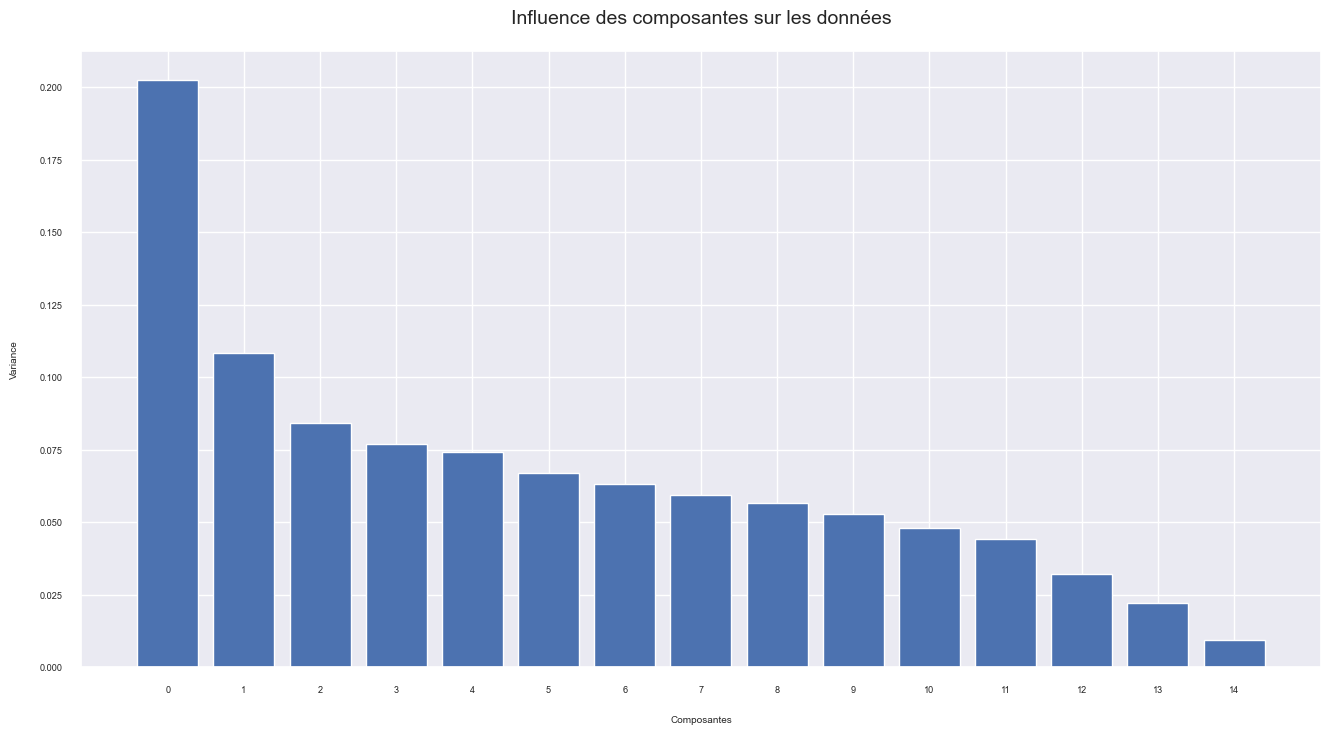

In [17]:
pca = PCA()
pca.fit(data_scaled)

features = range(pca.n_components_)

data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

plt.figure(figsize = (16,8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Variance', labelpad = 15)
plt.xlabel('Composantes', labelpad = 15)
plt.title('Influence des composantes sur les données', pad = 20, fontsize = 14);

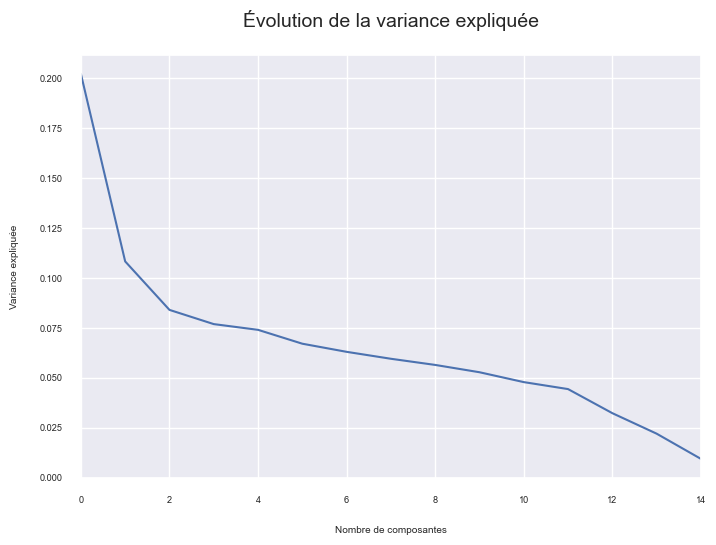

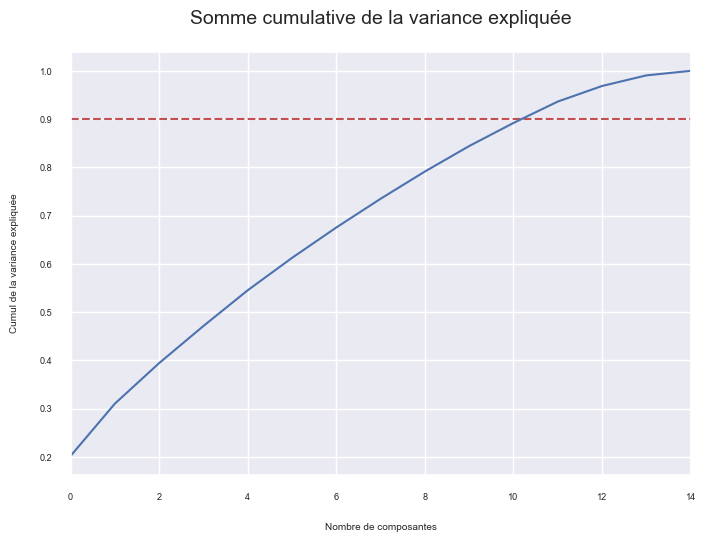

In [18]:
plt.figure()
plt.xlim(0,14)
plt.plot(pca.explained_variance_ratio_)
plt.title('Évolution de la variance expliquée', pad = 20, fontsize = 14)
plt.xlabel('Nombre de composantes', labelpad = 15)
plt.ylabel('Variance expliquée', labelpad = 15);

plt.figure()
plt.xlim(0,14)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Somme cumulative de la variance expliquée', pad = 20, fontsize = 14)
plt.xlabel('Nombre de composantes', labelpad = 15)
plt.ylabel('Cumul de la variance expliquée', labelpad = 15);


In [19]:
pca = PCA(n_components = 0.9)
pca.fit(data_scaled)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 12


In [20]:
pca2 = PCA(n_components = 12)
pca2.fit(data_scaled)
data_pca2 = pca2.transform(data_scaled)

## **K-Means**

In [21]:
inertie = []
for n in range(1, 51):
    kmeans = (KMeans(n_clusters = n, init='k-means++', random_state = 42))
    kmeans.fit(data_pca2)
    inertie.append(kmeans.inertia_)    

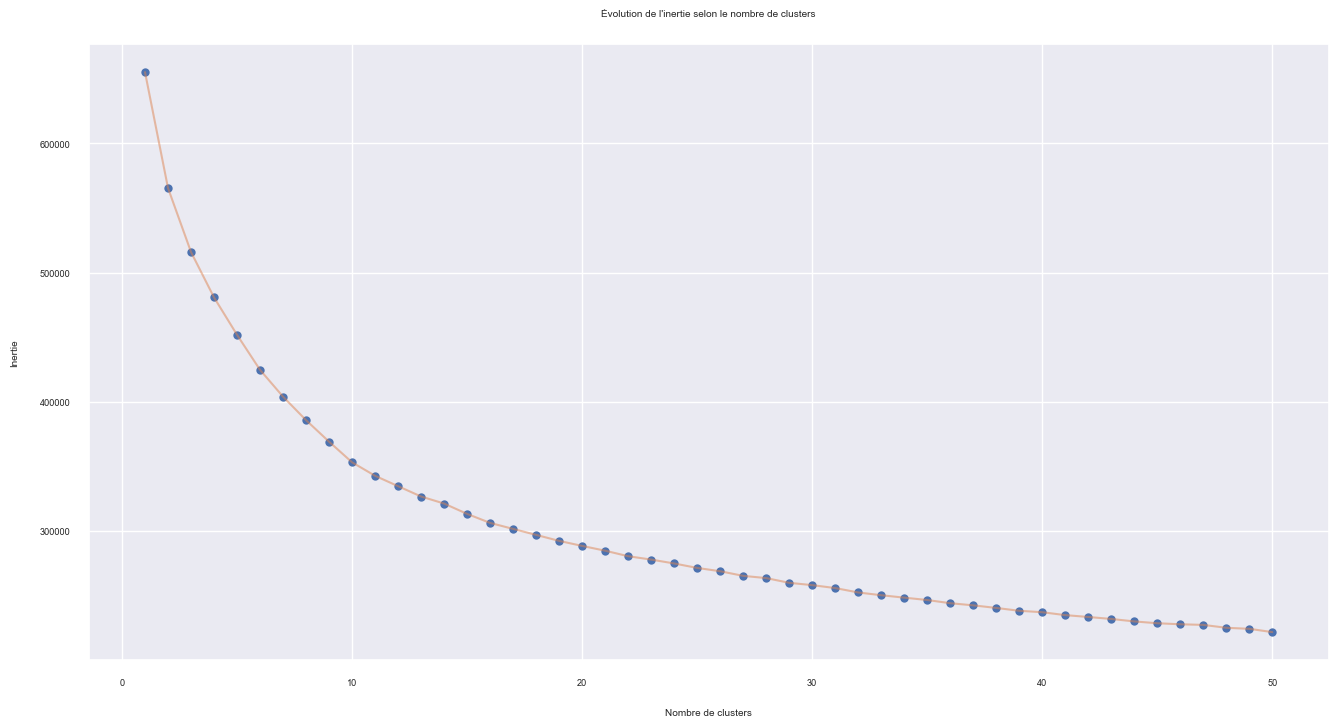

In [22]:
plt.figure(1, figsize = (16, 8))
plt.plot(np.arange(1, 51), inertie, 'o')
plt.plot(np.arange(1, 51), inertie, '-', alpha = 0.5)
plt.xlabel('Nombre de clusters', labelpad = 15), 
plt.ylabel('Inertie', labelpad = 15)
plt.title("Évolution de l'inertie selon le nombre de clusters", pad = 20)
plt.show()

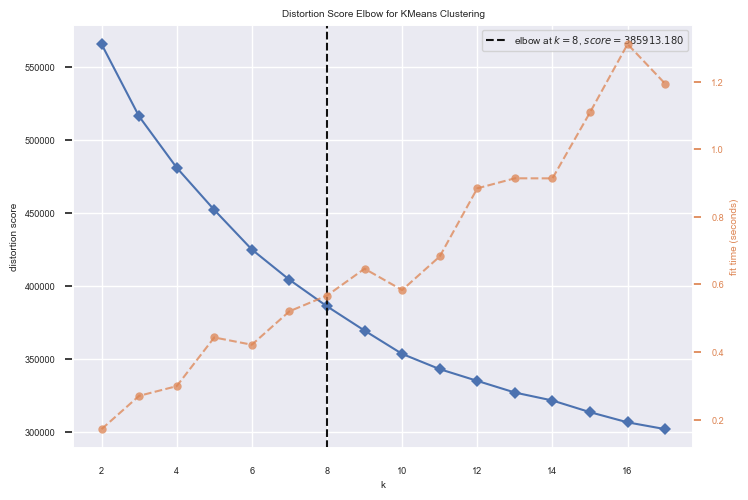

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
X = data_pca2
km = KMeans(random_state = 42)
visualizer = KElbowVisualizer(km, k = (2,18))
 
visualizer.fit(X)        
visualizer.show()     

In [24]:
X = data_pca2

range_n_clusters = range(6,16)
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(X) 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 6 The average silhouette_score is : 0.12985778972970774
For n_clusters = 7 The average silhouette_score is : 0.1352626941700155
For n_clusters = 8 The average silhouette_score is : 0.13220186796320943
For n_clusters = 9 The average silhouette_score is : 0.1298401082931549
For n_clusters = 10 The average silhouette_score is : 0.13147088225349415
For n_clusters = 11 The average silhouette_score is : 0.1246830913075341
For n_clusters = 12 The average silhouette_score is : 0.12316517581688595
For n_clusters = 13 The average silhouette_score is : 0.1275344500423248
For n_clusters = 14 The average silhouette_score is : 0.11918304538822397
For n_clusters = 15 The average silhouette_score is : 0.12949853918618992


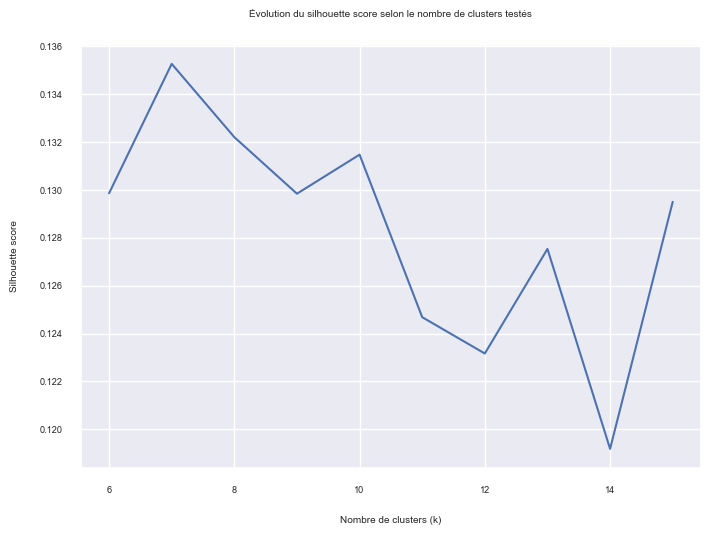

In [25]:
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Nombre de clusters (k)", labelpad = 15)
plt.ylabel("Silhouette score", labelpad = 15)
plt.title("Évolution du silhouette score selon le nombre de clusters testés", pad = 20)
plt.show()

For n_clusters = 6 The average silhouette_score is : 0.12985778972970774
For n_clusters = 7 The average silhouette_score is : 0.1352626941700155
For n_clusters = 8 The average silhouette_score is : 0.13220186796320943
For n_clusters = 9 The average silhouette_score is : 0.1298401082931549
For n_clusters = 10 The average silhouette_score is : 0.13147088225349415


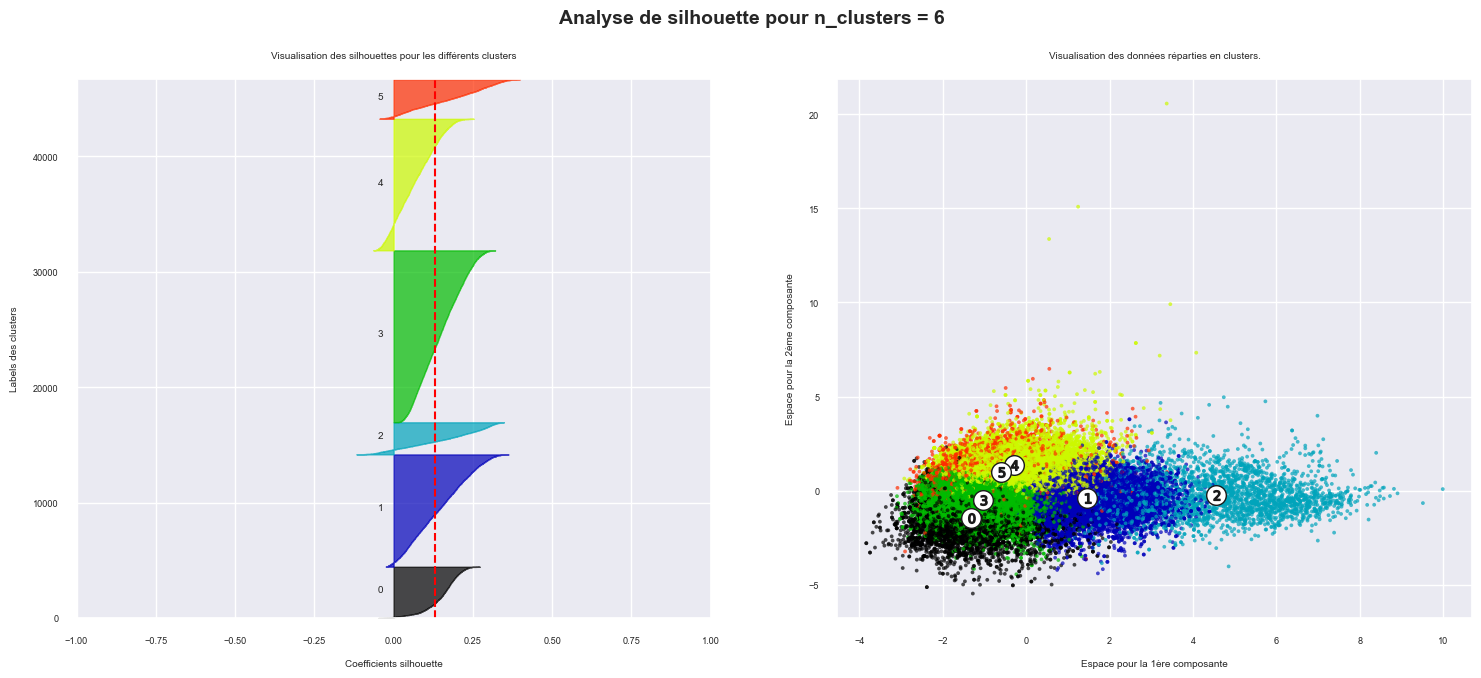

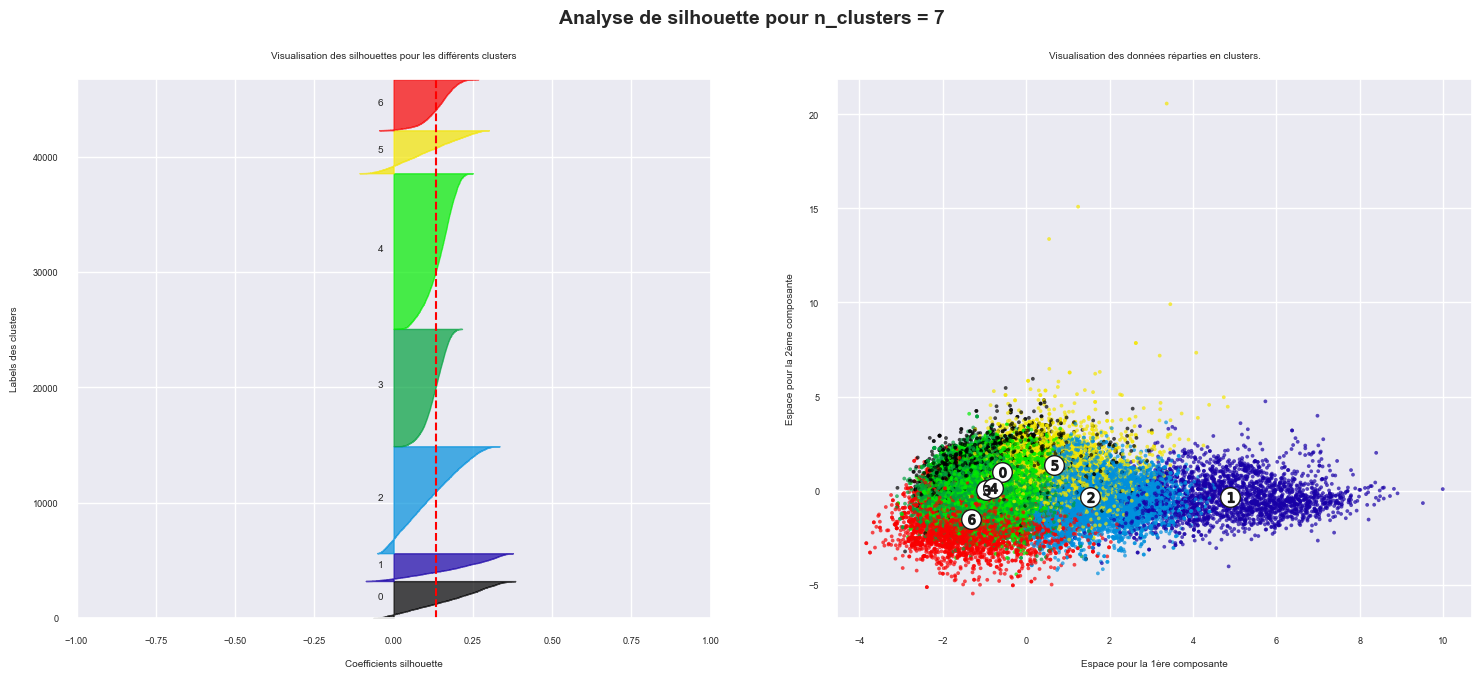

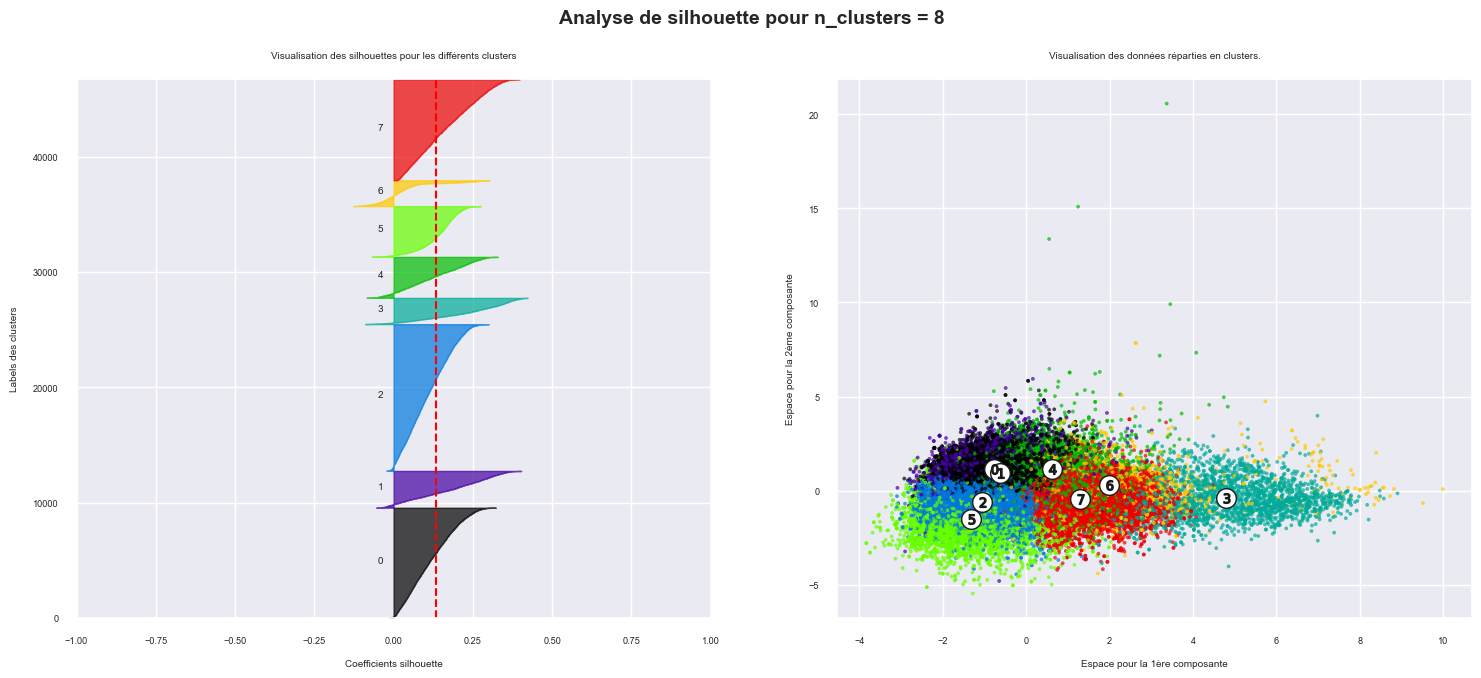

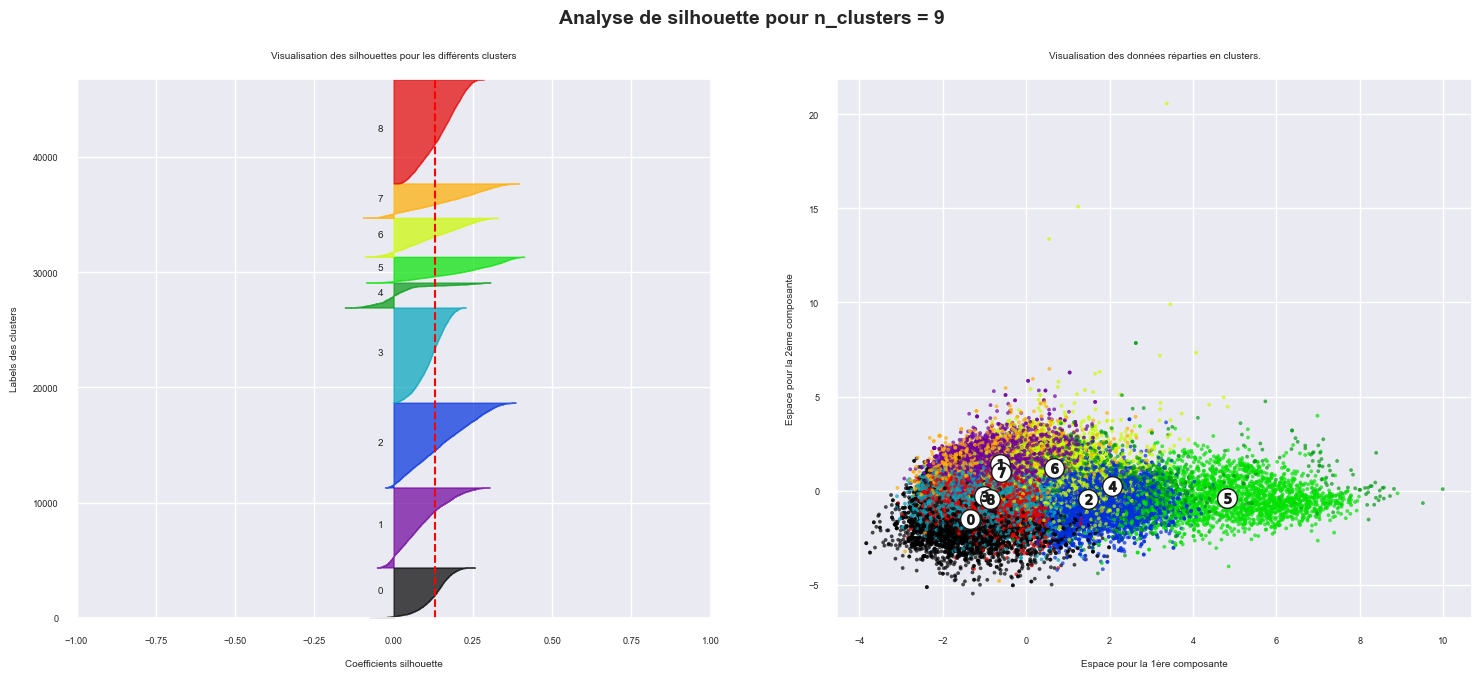

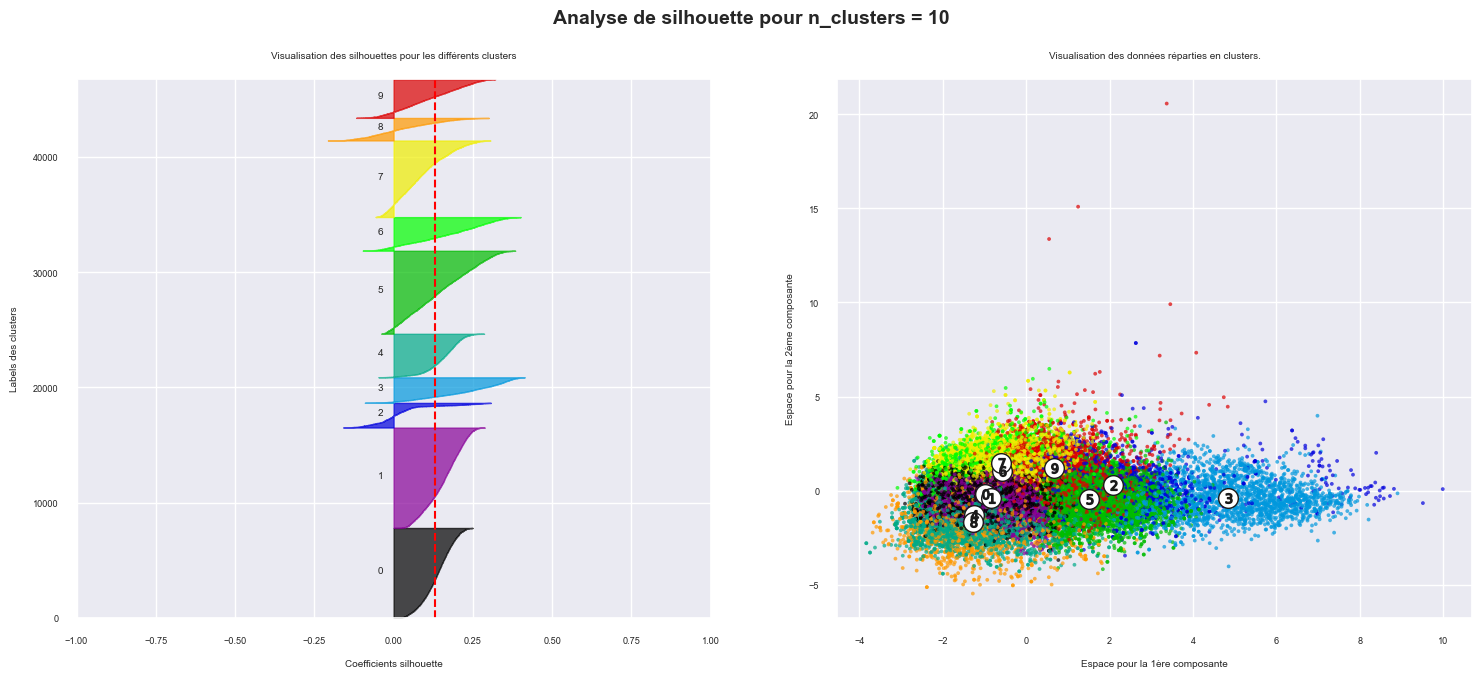

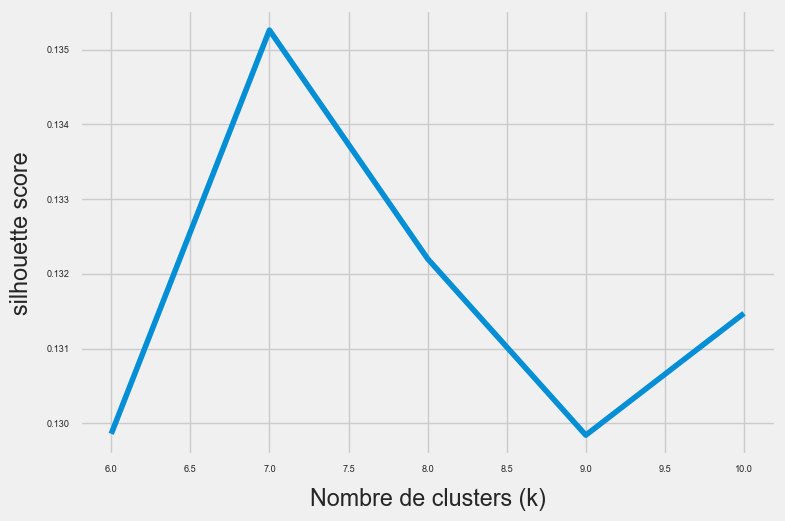

In [26]:
X = data_pca2

range_n_clusters = [6, 7, 8, 9, 10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualisation des silhouettes pour les différents clusters", pad = 15)
    ax1.set_xlabel("Coefficients silhouette", labelpad = 10)
    ax1.set_ylabel("Labels des clusters", labelpad = 10)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualisation des données réparties en clusters.", pad = 15)
    ax2.set_xlabel("Espace pour la 1ère composante", labelpad = 10)
    ax2.set_ylabel("Espace pour la 2ème composante", labelpad = 10)

    plt.suptitle(("Analyse de silhouette pour n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Nombre de clusters (k)", labelpad = 10)
plt.ylabel("silhouette score", labelpad = 10)
plt.show()

## **Finalization**

In [27]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++')

pipeline = make_pipeline(scaler, pca2, kmeans)

model_fit = pipeline.fit(df2)
model_fit

labels = model_fit.predict(df2)
df2['Clusters_2'] = labels

df2.groupby('Clusters_2').count()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Clusters_2,,,,,,,,,,,,,,,
0,13440,13440,13440,13440,13440,13440,13440,13440,13440,13440,13440,13440,13440,13440,13440
1,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422,4422
2,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377,2377
3,9485,9485,9485,9485,9485,9485,9485,9485,9485,9485,9485,9485,9485,9485,9485
4,10060,10060,10060,10060,10060,10060,10060,10060,10060,10060,10060,10060,10060,10060,10060
5,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614
6,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243,3243


In [28]:
cluster_heatmap_df = df2.groupby(['Clusters_2'])[['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']].median()

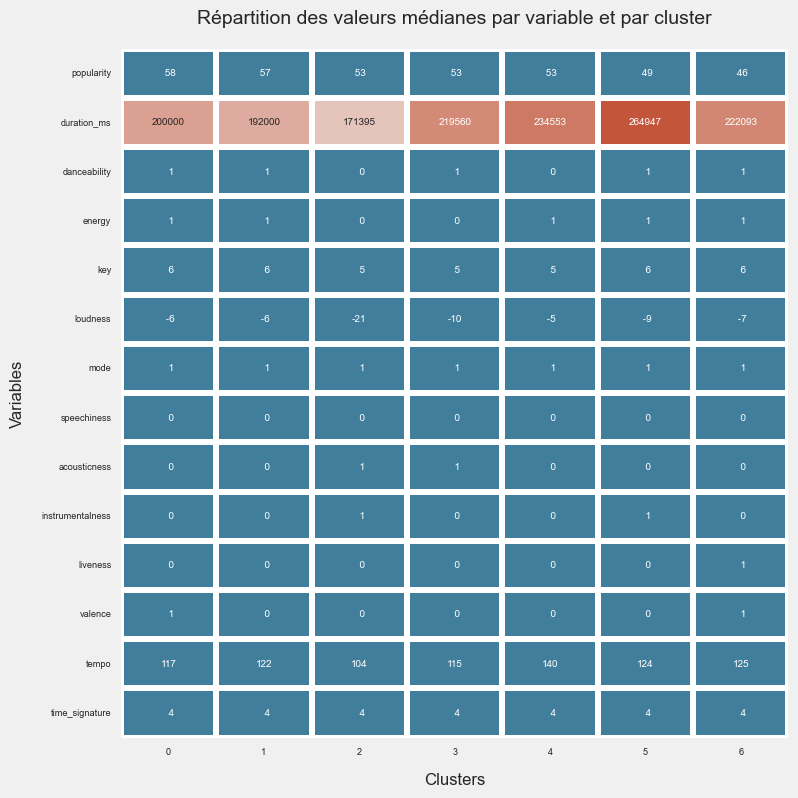

In [29]:
heatcmap = sns.diverging_palette(230, 20, as_cmap = True)
fig, ax = plt.subplots(1, 1, figsize = (8,8))
sns.set(font_scale = 0.6)
sns.heatmap(cluster_heatmap_df.T, linewidth = 3, cmap = heatcmap, cbar = False, annot = True, ax = ax, fmt='3.0f');
ax.set_title('Répartition des valeurs médianes par variable et par cluster', fontsize = 14, pad = 18)
plt.xlabel('Clusters', fontsize = 12, labelpad = 12)
plt.ylabel('Variables', fontsize = 12, labelpad = 12)
plt.tight_layout();

---

# **Add clusters to the dataset**

In [30]:
dataset = dataset.loc[dataset['popularity'] > 40]
dataset['cluster_genres'] = df['Clusters']
dataset['cluster_attributs'] = df2['Clusters_2']
dataset['artist_track'] = dataset[['artists', 'track_name']].agg(', '.join, axis=1)
final = dataset
dataset

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster_genres,cluster_attributs,artist_track
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0,0,"Gen Hoshino, Comedy"
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0,3,"Ben Woodward, Ghost - Acoustic"
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson, ZAYN",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0,3,"Ingrid Michaelson, ZAYN, To Begin Again"
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0,3,"Kina Grannis, Can't Help Falling In Love"
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0,3,"Chord Overstreet, Hold On"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113973,1d2LyEJ1zZ0gWtlxyZQpDE,Vertical Worship,The Rock Won't Move,I Will Follow,44,260839,False,0.319,0.5770,4,...,0.0499,0.000000,0.7290,0.1890,97.678,4,world-music,6,6,"Vertical Worship, I Will Follow"
113976,11Jywidl4OVzmjziGR0QiO,Urban Rescue,Wild Heart,Alive In You,42,253546,False,0.522,0.6970,2,...,0.0557,0.000000,0.1340,0.2880,75.972,4,world-music,6,4,"Urban Rescue, Alive In You"
113980,64BdW5aHuB3C0QP3qjBJVi,I AM THEY,I AM THEY,Amen,41,238146,False,0.516,0.6340,7,...,0.0300,0.000002,0.0813,0.0921,76.994,4,world-music,6,4,"I AM THEY, Amen"
113984,0PjyOURxQ6wiHaBYXf53G2,Tenth Avenue North,The Light Meets The Dark,Healing Begins,44,237280,False,0.541,0.5830,2,...,0.0142,0.000000,0.1020,0.2760,96.008,4,world-music,6,4,"Tenth Avenue North, Healing Begins"


In [31]:
dataset.to_csv(r'final.csv')